In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import folium
import seaborn as sns

import math

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [22]:
location1 = r"C:\Users\madhu\Machine Learning\Practice Kaggle\datasets\novel-corona-virus-2019-dataset_2\COVID19_line_list_data.csv"
line_list = pd.read_csv(location1)
line_list.head(3)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# checking the columns
line_list.columns

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [24]:
# many columns do not contain any info, and therefore deleted
# line_list['Unnamed: 23'].values
# array([nan, nan, nan, ..., nan, nan, nan])

# New dataframe contains 19 columns and 1085 data points

relevent_columns = line_list.columns[:19]
line_list = line_list[relevent_columns]

# Column 'Unnamed: 3' doesnt contain any relevent info and is deleted
line_list.drop(['Unnamed: 3'], axis=1, inplace=True)

# Checking the shape of dataframe
print(line_list.shape)

(1085, 18)


In [25]:
line_list.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN


In [26]:
# Collecting all the datetime features

date_features = ['reporting date', 'symptom_onset', 'hosp_visit_date', 'exposure_start', 'exposure_end']

# Pasing all the date columns

for date_feature in date_features:
    line_list[date_feature] = pd.to_datetime(line_list[date_feature])

In [27]:
# Checking datatypes and shape

line_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null datetime64[ns]
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null datetime64[ns]
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null datetime64[ns]
exposure_start           128 non-null datetime64[ns]
exposure_end             341 non-null datetime64[ns]
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
dtypes: datetime64[ns](5), float

In [28]:
# Checking for NaN values in Date features

for i, date_feature in enumerate(date_features, start=1):
    print('Statement {}: {} contains NaN values : {}'.format(i, date_feature, line_list[date_feature].isnull().any()))

Statement 1: reporting date contains NaN values : True
Statement 2: symptom_onset contains NaN values : True
Statement 3: hosp_visit_date contains NaN values : True
Statement 4: exposure_start contains NaN values : True
Statement 5: exposure_end contains NaN values : True


In [29]:
# Making a seperate dataframe for all the date colums

date_df = line_list[date_features]
date_df

,reporting date,symptom_onset,hosp_visit_date,exposure_start,exposure_end
0,2020-01-20,2020-01-03,2020-01-11,2019-12-29,2020-01-04
1,2020-01-20,2020-01-15,2020-01-15,NaT,2020-01-12
2,2020-01-21,2020-01-04,2020-01-17,NaT,2020-01-03
3,2020-01-21,NaT,2020-01-19,NaT,NaT
4,2020-01-21,NaT,2020-01-14,NaT,NaT
...,...,...,...,...,...
1080,2020-02-25,NaT,NaT,NaT,NaT
1081,2020-02-24,NaT,NaT,NaT,NaT
1082,2020-02-26,NaT,NaT,NaT,2020-02-17
1083,2020-02-25,NaT,NaT,2020-02-19,2020-02-21


In [30]:
# extracting new information from the date columns and creating seperate dataframe for the new info derived

date_df['exposure_period'] = date_df.exposure_end - date_df.exposure_start
date_df['diagnose_period'] = date_df['reporting date'] - date_df.hosp_visit_date 
date_df['exp_to_symptm_period'] = date_df.symptom_onset - date_df.exposure_start
date_df['sympt_to_hosp_period'] = date_df.hosp_visit_date - date_df.symptom_onset

period_df = date_df[['exposure_period', 'diagnose_period', 'exp_to_symptm_period', 'sympt_to_hosp_period']]
period_df

,exposure_period,diagnose_period,exp_to_symptm_period,sympt_to_hosp_period
0,6 days,9 days,5 days,8 days
1,NaT,5 days,NaT,0 days
2,NaT,4 days,NaT,13 days
3,NaT,2 days,NaT,NaT
4,NaT,7 days,NaT,NaT
...,...,...,...,...
1080,NaT,NaT,NaT,NaT
1081,NaT,NaT,NaT,NaT
1082,NaT,NaT,NaT,NaT
1083,2 days,NaT,NaT,NaT


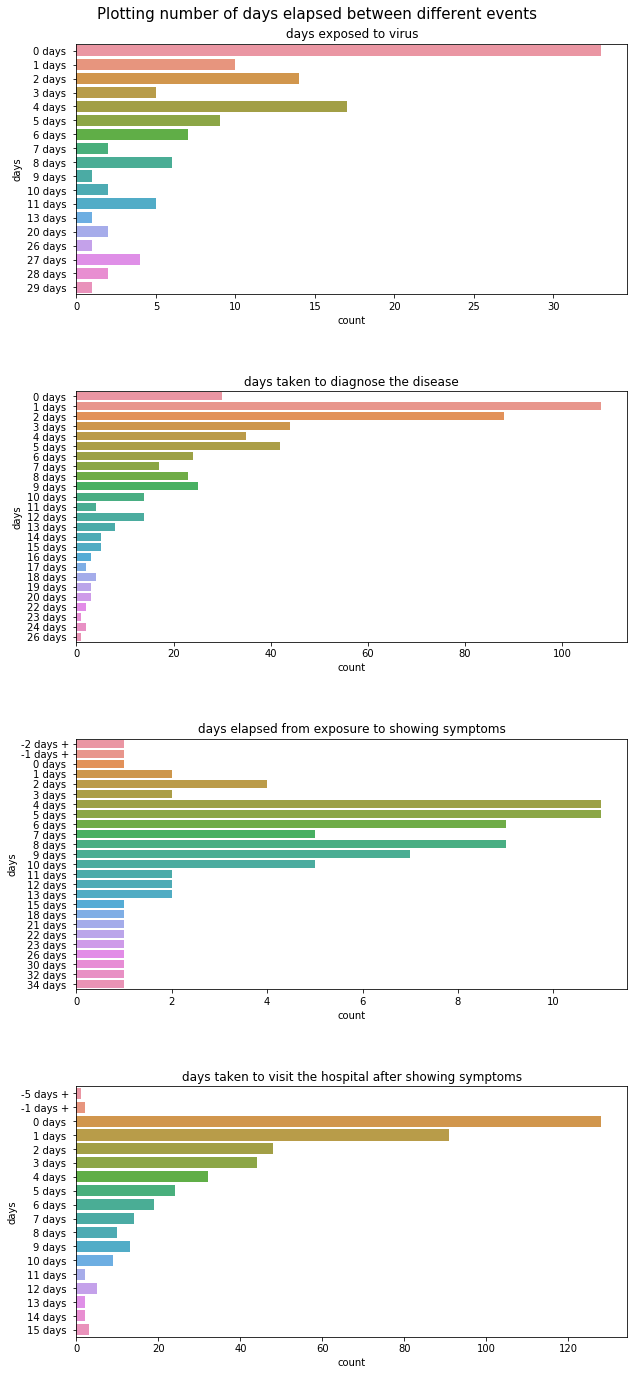

In [31]:
# Understanding number of days elapsed per for different events

# Setting the titles for the graphs

titles = ['days exposed to virus', 'days taken to diagnose the disease', 'days elapsed from exposure to showing symptoms', 'days taken to visit the hospital after showing symptoms']

#creating subplots

fig, ax = plt.subplots(4, figsize=(10,20))
ax = ax.flatten()
fig.suptitle('Plotting number of days elapsed between different events', fontsize=15)
for i, period in enumerate(period_df.columns):
    days_elapsed = period_df[period].value_counts().rename_axis('days').reset_index(name='count')
    days_elapsed.sort_values('days', inplace=True)
    days_elapsed['days'] = days_elapsed['days'].astype('str')
    days_elapsed['days'] = days_elapsed['days'].str.split('00:00:00.', expand=True)
    sns.barplot(y='days', x='count', data=days_elapsed, ax=ax[i])
    ax[i].set_title(titles[i])
plt.tight_layout(pad=5)

The negative days in the plot 'days elapsed from exposure to showing symptoms' probably indicates that the patient already had some infection which caused a decrese in immunity leading to the contract of the virus

The negative days in the plot 'days taken to visit the hospital after showing symptoms' might be the cases of visiting hospital out of fear and development of acute symptoms after the visit, or could be bogus data

In [32]:
location2 = r"C:\Users\madhu\Machine Learning\Practice Kaggle\datasets\novel-corona-virus-2019-dataset_2\COVID19_open_line_list.csv"
open_line = pd.read_csv(location2)
open_line = open_line.iloc[:, :-12]
open_line.head(3)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN


In [33]:
# Check for missing information, datatypes and shape
open_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 33 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
wuhan(0)_not_wuhan(1)       13170 non-null float64
latitude                    13147 non-null float64
longitude                   13147 non-null float64
geo_resolution              13147 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
lives_in_Wuhan              565 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
addi

In [34]:
# running a loop to look at the data contained in each feature columns to analyze which one is relevent 

for col in open_line.columns:
    print(open_line[col].value_counts().head(4))
    print('')

11783.0    1
6436.0     1
8437.0     1
5362.0     1
Name: ID, dtype: int64

50-59    47
60-69    39
23-72    35
16-80    34
Name: age, dtype: int64

male      703
female    551
Female      5
Male        4
Name: sex, dtype: int64

Wenzhou City      448
Yokohama Port     391
Shenzhen City     357
Guangzhou City    277
Name: city, dtype: int64

Guangdong    1228
Zhejiang     1074
Henan        1036
Hunan         884
Name: province, dtype: int64

China          10446
South Korea      938
Japan            731
Italy            588
Name: country, dtype: int64

1.0    13170
Name: wuhan(0)_not_wuhan(1), dtype: int64

35.78134    552
35.45085    545
27.90538    448
22.65389    357
Name: latitude, dtype: int64

128.5800    552
139.6651    545
120.4404    448
114.1291    357
Name: longitude, dtype: int64

admin2    7960
admin1    2841
admin3    1106
point     1074
Name: geo_resolution, dtype: int64

22.01.2020    43
25.01.2020    42
24.01.2020    41
26.01.2020    36
Name: date_onset_symptoms, dtype

column wuhan(0)_not_wuhan(1) indicates that all are from outside of wuhan the epicentre of the disease

sex contains some ambiguities, and are corrected by changing it to sentence case. column age 

additional_information, reported_market_exposure : currently not planning an analysis of it
    
the feature columns below gives very less or ambiguous information and hence not taken into consideration:
age, chronic_disease_binary, chronic_disease, sequence_available, outcome, date_death_or_discharge, notes_for_discussion, location, admin3, admin2, admin1, country_new, admin_id, data_moderator_initials, lives_in_Wuhan, travel_history_dates, travel_history_location

In [35]:
# Our data frame reduces as shown below

open_line = open_line[['sex', 'city', 'province', 'country','latitude', 'longitude', 'geo_resolution',
                       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'symptoms', 'lives_in_Wuhan', 
                       'travel_history_dates', 'travel_history_location']]
open_line.shape

(14126, 14)

In [36]:
# Creating a function fro age bins (age_groups)

def age_grp(age):
    if age>0:
        if int(age)%10!=0:
            lower = (math.floor(int(age)/10))*10
            upper = (math.ceil(int(age)/10))*10-1
            return '{}-{}'.format(lower, upper)
        else:
            lower = int(age)
            upper = int(age)+9
            return '{}-{}'.format(lower, upper)
    else:
        return np.nan

In [37]:
# Removing the ambiguities in the 'sex' column

open_line.drop(open_line.loc[open_line.sex=='4000'].index, inplace=True)
open_line['sex'].replace('male', 'Male', inplace=True)
open_line['sex'].replace('female', 'Female', inplace=True)

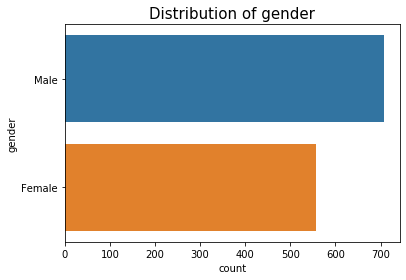

In [38]:
# Plotting the distribution of gender

gender_df = open_line.sex.value_counts().rename_axis('gender').reset_index(name='count')
gender_df.head()
sns.barplot(y='gender', x='count', data=gender_df)
plt.title('Distribution of gender', fontsize=15)
plt.show()

Probably because of the higher proportion of male travellers.

No cosiderable imbalance noticed

In [39]:
# Separate dataframe for city latitude, longitude

location_df = open_line.groupby(['city'])['latitude', 'longitude'].mean().reset_index()
location_df = location_df.dropna()

# Geospatial tagging using folium

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='cartodbpositron')

for lat, lon,city in zip(location_df['latitude'], location_df['longitude'], location_df['city']):
    folium.CircleMarker([lat, lon], radius=.5, color='red', fill_color='black',fill_opacity= 0.8).add_to(world_map)
world_map

In [41]:
# Seperate dataframe for symptoms

symptoms_df = open_line['symptoms']
symptoms_df.dropna(inplace=True)
symptoms_df = symptoms_df.reset_index()

In [42]:
# A function to extract symptoms

def find_symptoms(word):
    word_split = word.replace('()',',').split(',')
    word_split = [word.strip().rstrip(',') for word in word_split]
    key_symptoms.extend(word_split)

In [43]:
# creating a dataframe of major symptoms
key_symptoms = []
symptoms_df['symptoms'].dropna().apply(find_symptoms)
key_symptoms = pd.Series(key_symptoms)
key_symptoms = key_symptoms[key_symptoms!='']
major_symptoms = key_symptoms.value_counts().iloc[:25]
major_symptoms[:10]

fever          290
cough          158
sore throat     27
pneumonitis     19
fatigue         17
pneumonia       16
chills          16
runny nose      13
headache        13
malaise         12
dtype: int64

In [44]:
def word_cloud(words):
    wordcloud = WordCloud(background_color='yellow', width = 1024, height=720).generate(words)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

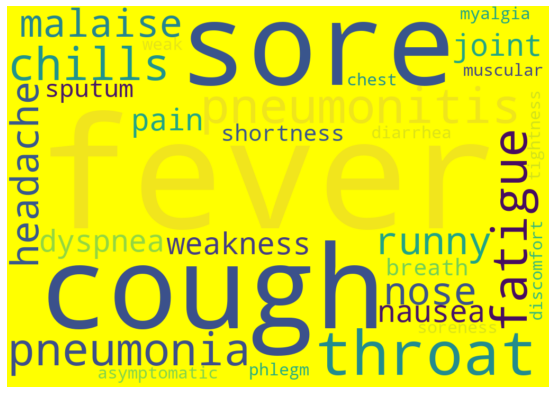

In [45]:
plt.figure(figsize=(12,7))
word_cloud(' '.join(major_symptoms.index.tolist()))